In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiment = "a"

In [3]:
filepath = os.path.join("input_data", experiment+".txt")
f = open(filepath)

In [4]:
first_line = f.readline()
vals = first_line.split(" ")
D = int(vals[0])
I = int(vals[1])
S = int(vals[2])
V = int(vals[3])
F = int(vals[4])
print("D={}, I={}, S={}, V={}, F={}".format(D,I,S,V,F))

D=6, I=4, S=5, V=2, F=1000


In [5]:
# Create street map {"streetname": next_intersection}
street_map = {}          
for i in range(S):
    l = f.readline()
    vals = l.split(" ")
    B = int(vals[0])     # intersection beginning of the street
    E = int(vals[1])     # intersection end of the street
    name = vals[2]  # street name
    L = int(vals [3]) 
    
    street_map[name] = E
    


In [6]:
# Create ranking how many times an intersection is part of path. Row index corresponds to intersection id
ranking = np.zeros(I)

for j in range(V):
    l = f.readline()
    vals = l.split("\n")[0].split(" ")
    for i in range(1,int(vals[0])): # do not consider last street because last intersection isn't travelled through
        street_on_path = vals[i]
        ranking[street_map[street_on_path]] += 1
        
    

In [7]:
# Check if path only contains intersections that are passed one time

f = open(filepath)

for i in range(S+1): #skip part of file defining the streets
    l = f.readline()
    pass

num_solo_paths = 0

for j in range(V):
    l = f.readline()
    vals = l.split("\n")[0].split(" ")
    solo_path = True
    
    for k in range(1,int(vals[0])): # do not consider last street because last intersection isn't travelled through
        street_on_path = vals[k]
        
        if ranking[street_map[street_on_path]] > 1:
            solo_path = False
            break
            
    if solo_path == True:
        num_solo_paths += 1
        # todo: save solo path

print("Experiment ", experiment)
print(" Total number of cars = {}".format(V))
print(" Number of solo paths = {}".format(num_solo_paths))
print(" -> Percentage of solo paths: {} %".format(num_solo_paths/V*100))
        


Experiment  a
 Total number of cars = 2
 Number of solo paths = 0
 -> Percentage of solo paths: 0.0 %


In [8]:
# save intersection ranking to csv file
with open(os.path.join("analysis", experiment+"_intersection_stats.csv"), "w") as f:
    f.write("Intersection id ; number of passing cars \n")
    for i in range(len(ranking)):
        f.write("{} ; {} \n".format(i, ranking[i]))


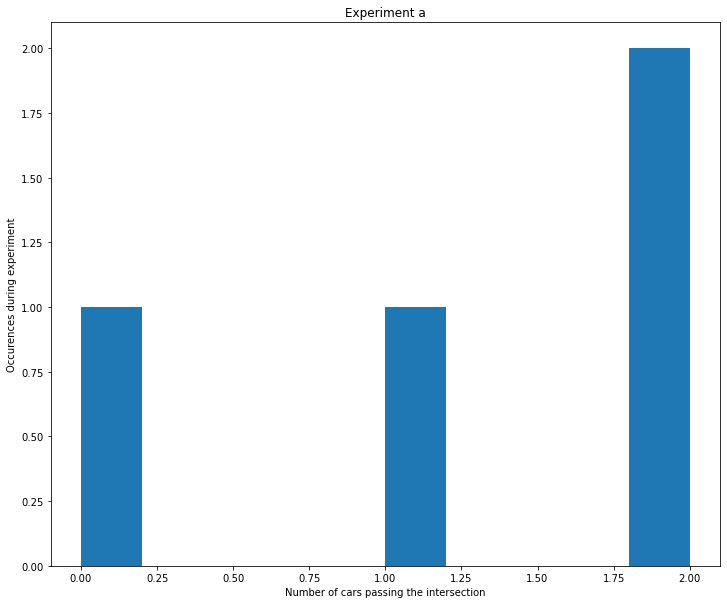

In [9]:
# create histogram
fig = plt.figure(figsize=(12, 10))
plt.hist(ranking)
plt.title("Experiment " + experiment)
plt.xlabel("Number of cars passing the intersection")
plt.ylabel("Occurences during experiment")
#plt.show()
plt.savefig(os.path.join("analysis", experiment+"_intersection_stats.png"))
